In [1]:
# Add the project base directory to the path
import os
import sys
project_dir = os.path.abspath('../../')
sys.path.insert(0, project_dir)
# Import GUARD
from guard import World, analysis, default_parameters, area

In [2]:
def simulation(world, n_sim, date_ranges):
    attack_frequency = []
    
    for run in range(n_sim):
        world.reset()
        attack_frequency.append(analysis.AttackEvents(world,
                                                      date_ranges=date_ranges))

        for step in range(1500):
            world.step(attack_frequency[run].sample)
            if world.step_number % 100 == 0:
                print('simulation: {:d}\tstep: {:4d}\tyear: {:d}'.format(
                      run, world.step_number, world.year())
                      )
    return attack_frequency

In [4]:
date_ranges = [
        analysis.DateRange(-1500, -1000),
        analysis.DateRange(-1000, -500),
        analysis.DateRange(-500, 0),
        analysis.DateRange(0, 500),
        analysis.DateRange(500, 1000),
        analysis.DateRange(1000, 1100),
        analysis.DateRange(1100, 1200),
        analysis.DateRange(1200, 1300),
        analysis.DateRange(1300, 1400),
        analysis.DateRange(1400, 1500)]

# Load battles data
world = World.from_file(project_dir+'/data/old_world.yml', default_parameters)
battles = analysis.Battles(world, date_ranges, 
                           project_dir+'/data/battles.yml')

# Check if simulation has been run before
if os.path.isfile('./attack_frequency.pkl'):
    mean_attack_frequency = analysis.AttackEvents.from_file(
        world, './attack_frequency.pkl'
        )
else:
    attack_frequency = simulation(world, 20, date_ranges)
    mean_attack_frequency = analysis.Battles.mean(attack_frequency)
    mean_attack_frequency.dump('./attack_frequency.pkl')


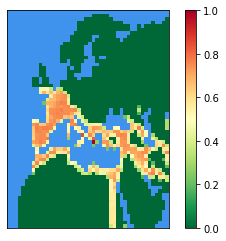

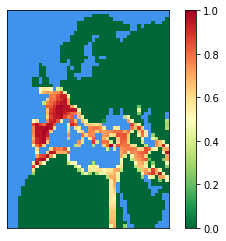

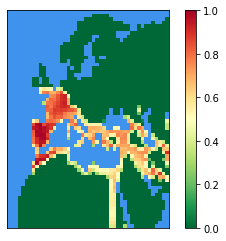

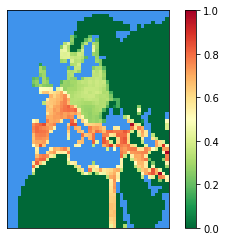

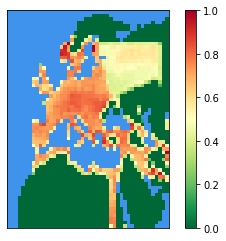

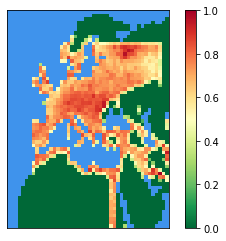

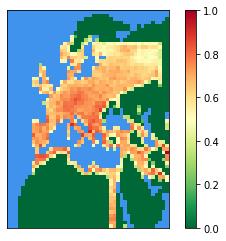

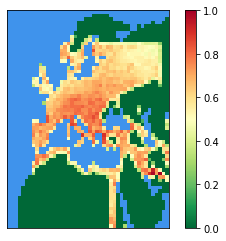

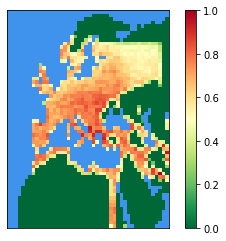

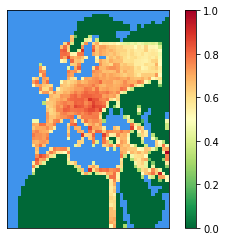

In [5]:
# Define european region
europe = area.Rectangle(3, 49, 58, 120)

# Plot attack frequency
mean_attack_frequency.plot_all(area=europe)

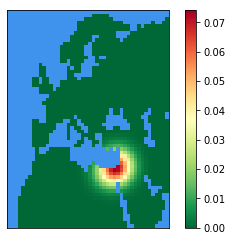

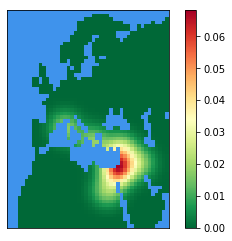

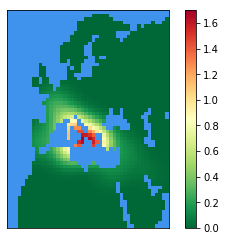

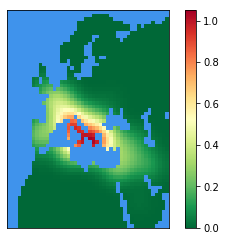

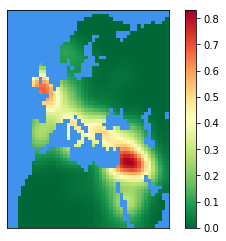

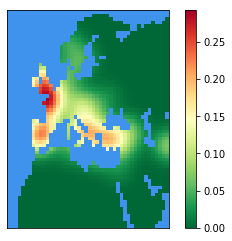

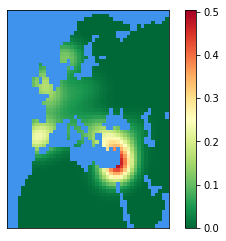

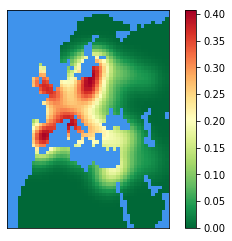

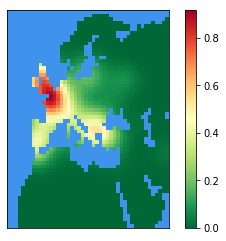

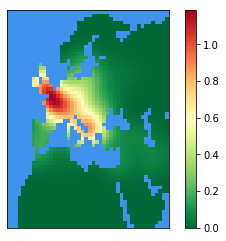

In [6]:
blur = 3.0

# Plot historical battles heatmap
battles.plot_heatmap(blur=blur, area=europe)

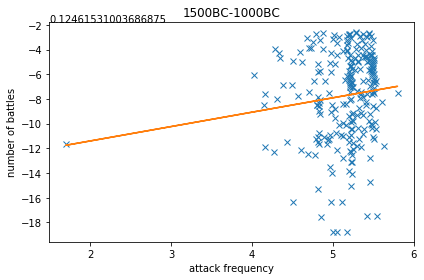

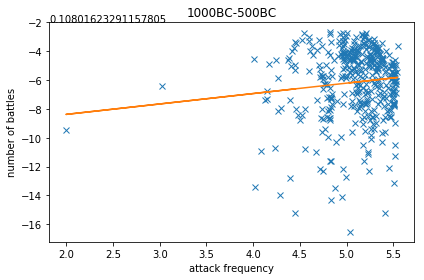

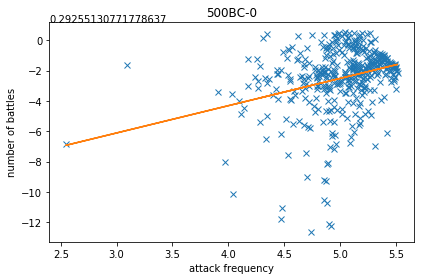

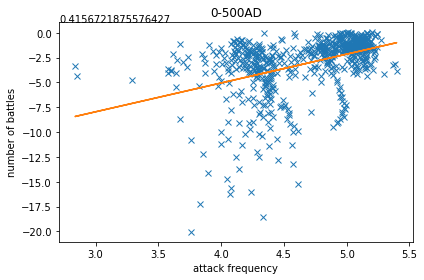

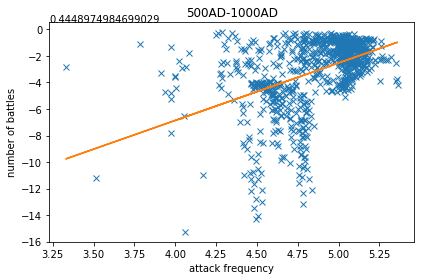

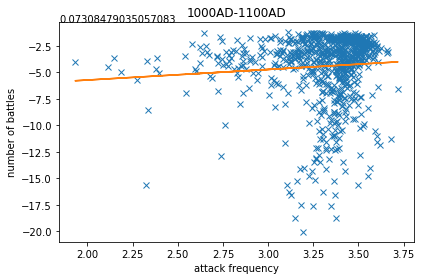

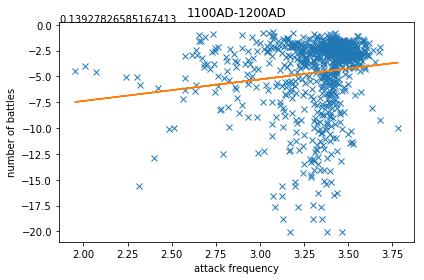

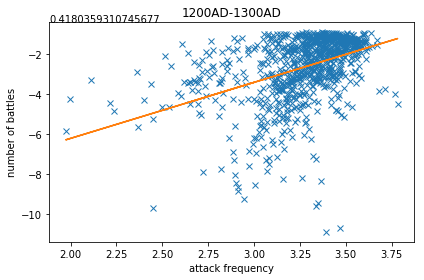

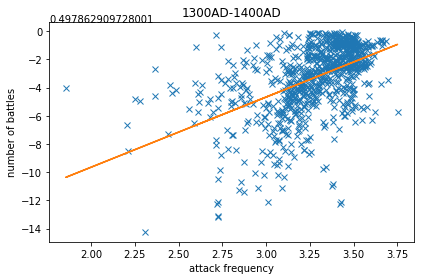

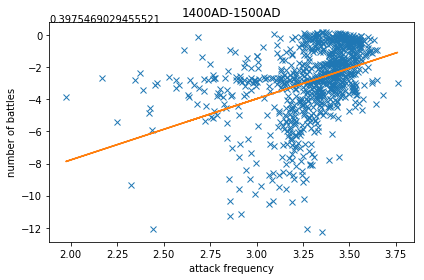

In [7]:
# Plot correlation using a log-log scale
battles.correlate(mean_attack_frequency, blur=blur, area=europe, log_log=True)